In [2]:
library(cluster)
library(caret)
library(dplyr)
library(clValid)
options(warn=-1)
library(dplyr)
library(DataExplorer)
library(gridExtra)
library(ggplot2)
library(tidyr)
library(patchwork)
library(cowplot)
library(scales)
library(tidyverse)
library(reshape2)
library(kableExtra)
library(vcd)
library(performanceEstimation)
library(class)
library(ipred)
library(caret)
library(mlbench)
library(ROCR)
library(pROC)
library(MASS)
library(countrycode)
library(randomForest);

Ładowanie wymaganego pakietu: ggplot2

Ładowanie wymaganego pakietu: lattice


Dołączanie pakietu: ‘dplyr’


Następujące obiekty zostały zakryte z ‘package:stats’:

    filter, lag


Następujące obiekty zostały zakryte z ‘package:base’:

    intersect, setdiff, setequal, union



Dołączanie pakietu: ‘gridExtra’


Następujący obiekt został zakryty z ‘package:dplyr’:

    combine



Dołączanie pakietu: ‘cowplot’


Następujący obiekt został zakryty z ‘package:patchwork’:

    align_plots


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1
✔ purrr     1.0.2     ✔ tibble    3.2.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor()  masks scales::col_factor()
✖ gridExtra::combine() masks dplyr::combine()
✖ purrr::discard()     masks scales::discard()
✖ dplyr::filter()      masks stats::filter()
✖ dplyr::lag()         masks stats::la

In [20]:
path_data = file.path("data", "sample_data.csv")
data <- read.csv(path_data, stringsAsFactors = TRUE)

In [21]:
x <- subset(data, select = -c(income_binary))

In [22]:
y <- subset(data, select = c(income_binary))

In [23]:
numerical_columns <- names(data[sapply(data, is.numeric)])
factor_columns <- names(data[sapply(data, is.factor)])

In [24]:
one_hot_encoded_data <- model.matrix(~ . -1, data = data)

In [25]:
x_encoded <- subset(one_hot_encoded_data, select = -c(income_binary))

In [26]:
scaled_data <- scale(x_encoded)

In [27]:
dissim_data <- daisy(scaled_data, metric = 'gower')
dissim_data_matrix  <- as.matrix(dissim_data)

In [117]:
pca_result <- prcomp(scaled_data, center = TRUE, scale. = TRUE)

In [118]:
summary(pca_result)

Importance of components:
                           PC1     PC2     PC3    PC4     PC5     PC6     PC7
Standard deviation     1.83084 1.55752 1.48271 1.3985 1.33732 1.29430 1.25871
Proportion of Variance 0.05587 0.04043 0.03664 0.0326 0.02981 0.02792 0.02641
Cumulative Proportion  0.05587 0.09630 0.13294 0.1655 0.19534 0.22326 0.24967
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.20435 1.17788 1.16490 1.13877 1.12939 1.11640 1.09406
Proportion of Variance 0.02417 0.02312 0.02262 0.02161 0.02126 0.02077 0.01995
Cumulative Proportion  0.27384 0.29696 0.31958 0.34119 0.36245 0.38323 0.40317
                          PC15    PC16    PC17    PC18    PC19   PC20    PC21
Standard deviation     1.09349 1.07840 1.06718 1.05883 1.05451 1.0507 1.04708
Proportion of Variance 0.01993 0.01938 0.01898 0.01869 0.01853 0.0184 0.01827
Cumulative Proportion  0.42310 0.44249 0.46147 0.48015 0.49869 0.5171 0.53536
                          PC22    

In [119]:
variance_pca <- (pca_result$sdev ^2)/sum(pca_result$sdev^2)
pca_data <- pca_result$x %>% data.frame
cumulative_variance <- cumsum(variance_pca)

In [120]:
variance_df <- data.frame(
  PC = seq_along(variance_pca),
  Variance = variance_pca
)

In [121]:
cumulative_variance_df <- data.frame(
  PC = seq_along(cumulative_variance),
  Variance = cumulative_variance
)

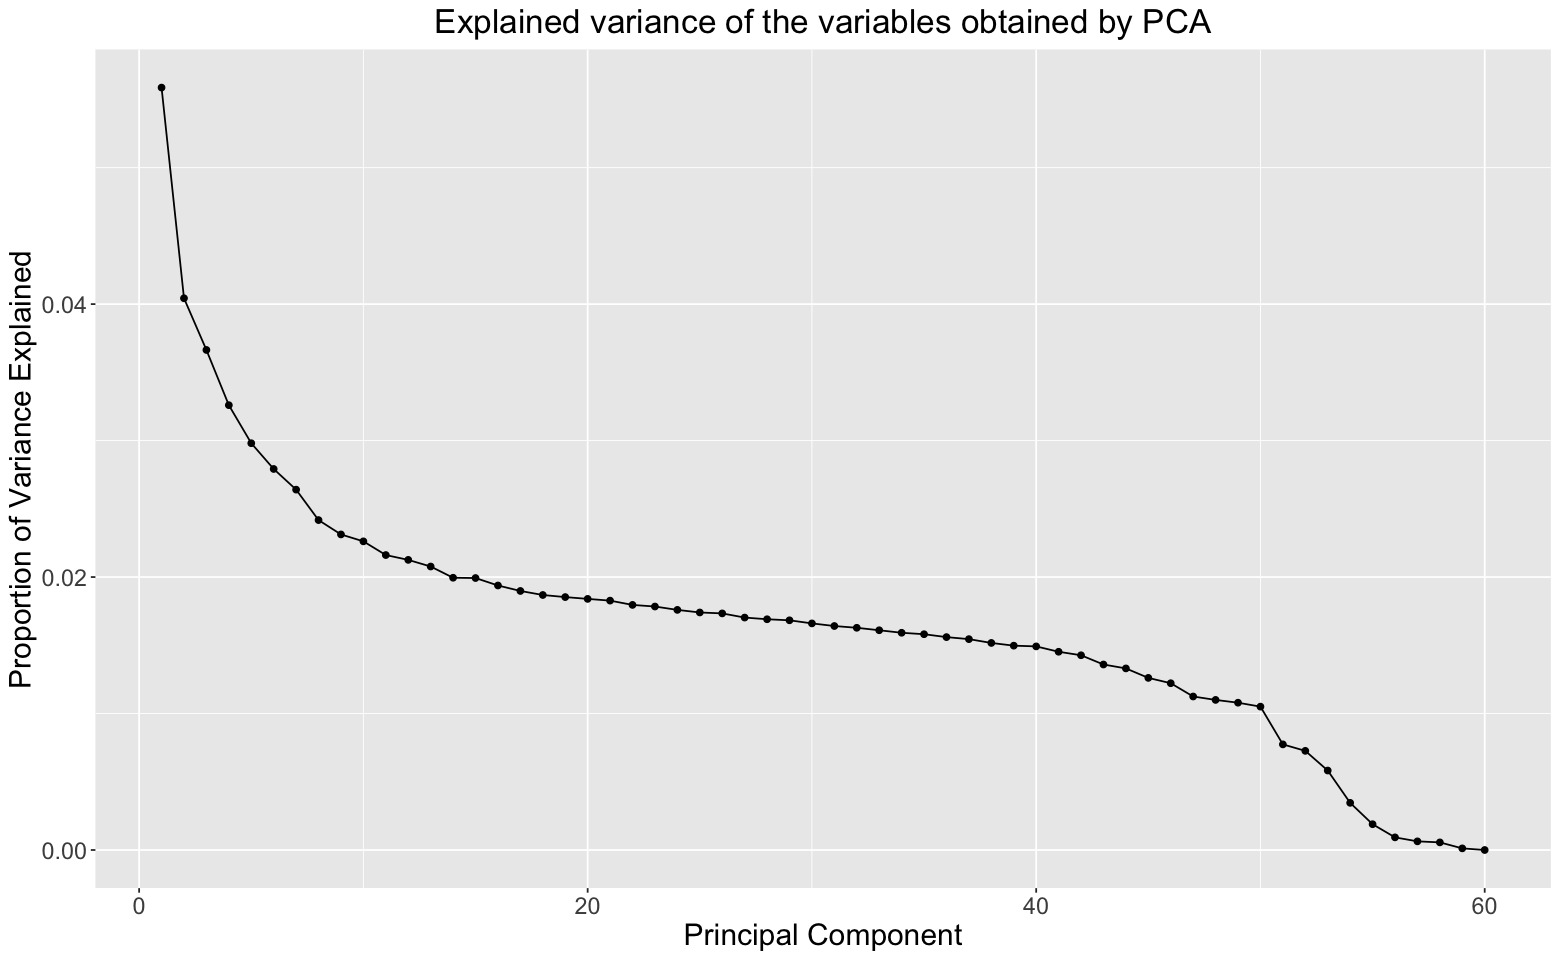

In [122]:
options(repr.plot.width=13, repr.plot.height=8)
p_variance_pca <- ggplot(variance_df, aes(x = PC, y = Variance)) +
  geom_point() +
  geom_line() +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Proportion of Variance Explained'
  ) +
  theme(axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title = element_text(size=18),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14)) + 
  theme(legend.background = element_rect(fill = alpha('white', 0)))
p_variance_pca

In [123]:
ggsave(file.path('images', 'variance_pca.jpg'), plot = p_variance_pca, width = 12, height = 8, units = "in")

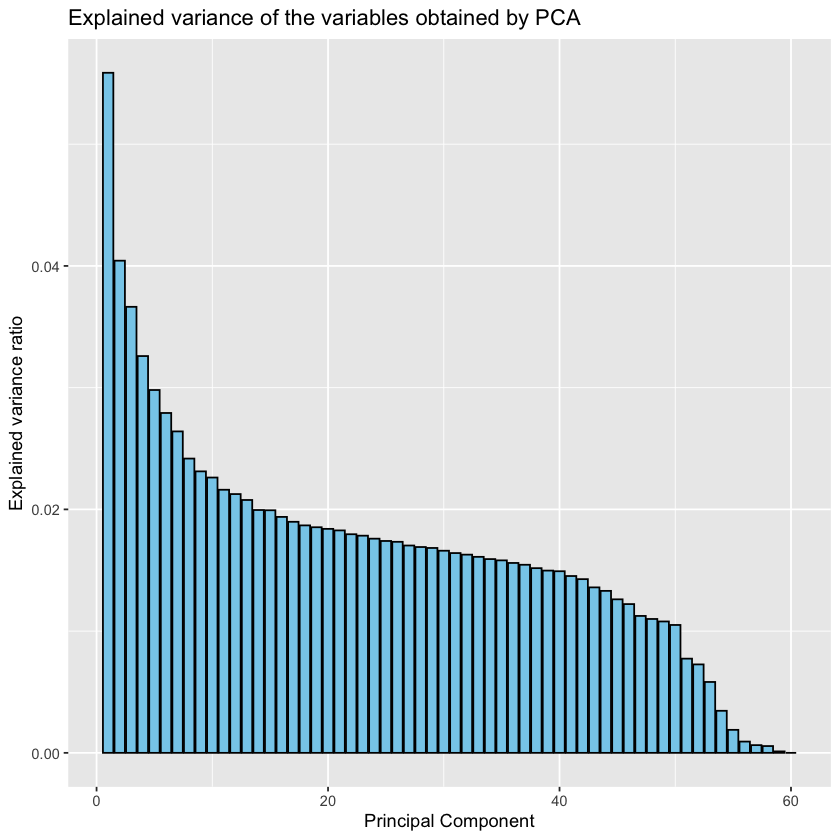

In [17]:
ggplot(variance_df, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Explained variance ratio'
  )

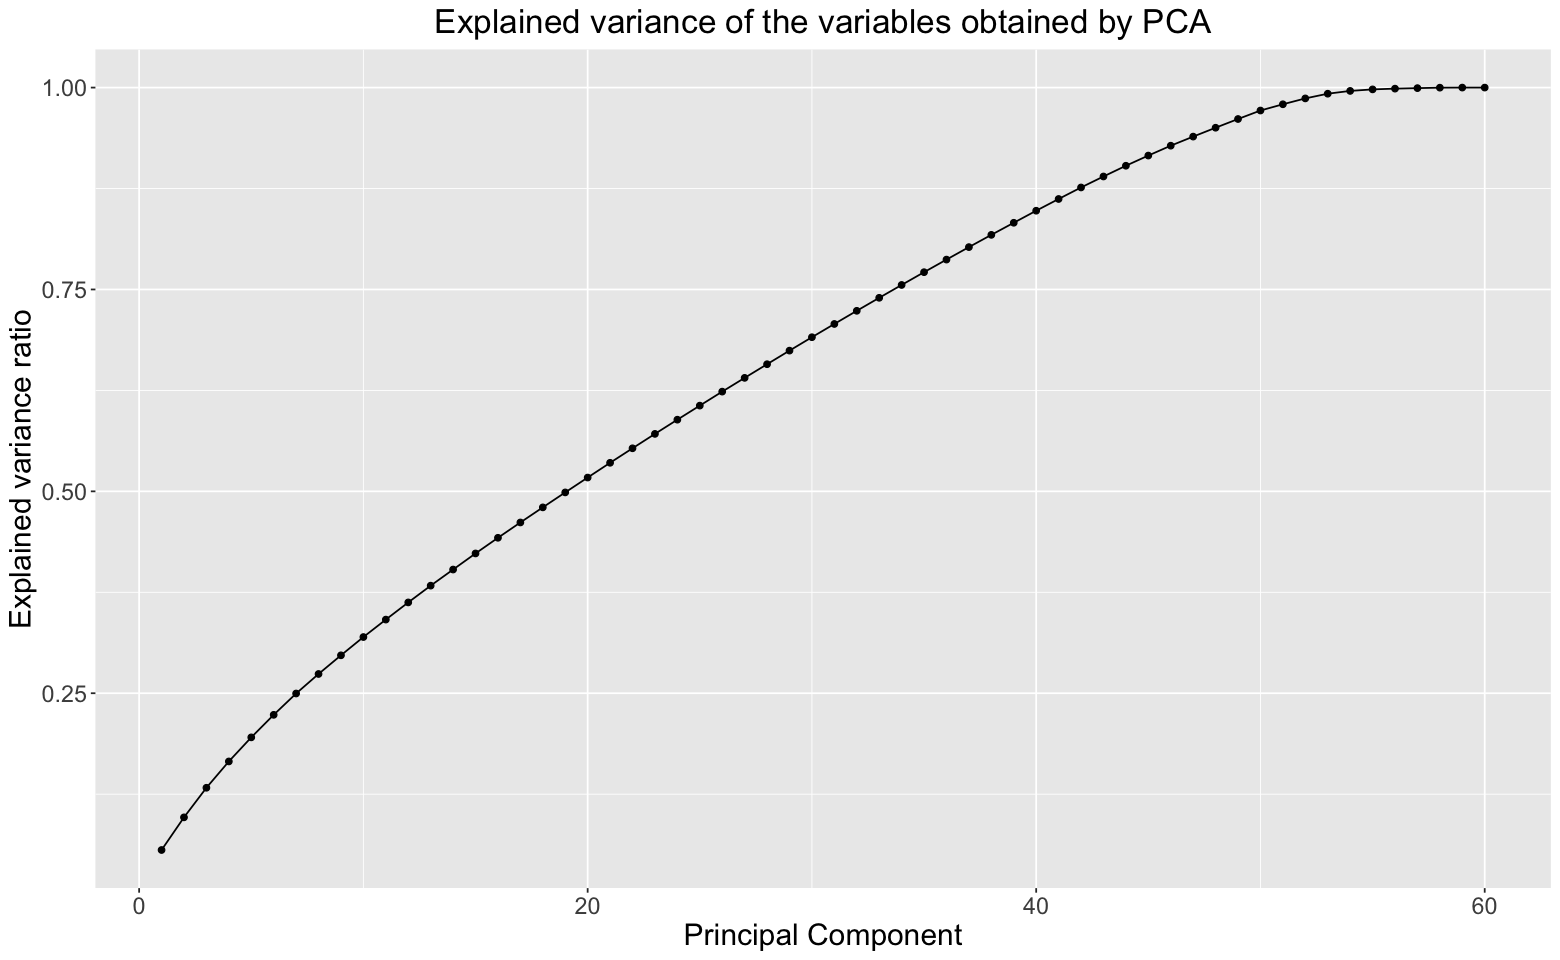

In [124]:
options(repr.plot.width=13, repr.plot.height=8)
p_cumulative_variance_pca <- ggplot(cumulative_variance_df, aes(x = PC, y = Variance)) +
  geom_point() +
  geom_line() +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Explained variance ratio'
  ) +
  theme(axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title = element_text(size=18),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14)) + 
  theme(legend.background = element_rect(fill = alpha('white', 0)))
p_cumulative_variance_pca

In [125]:
ggsave(file.path('images', 'cumulative_variance_pca.jpg'), plot = p_cumulative_variance_pca, width = 12, height = 8, units = "in")

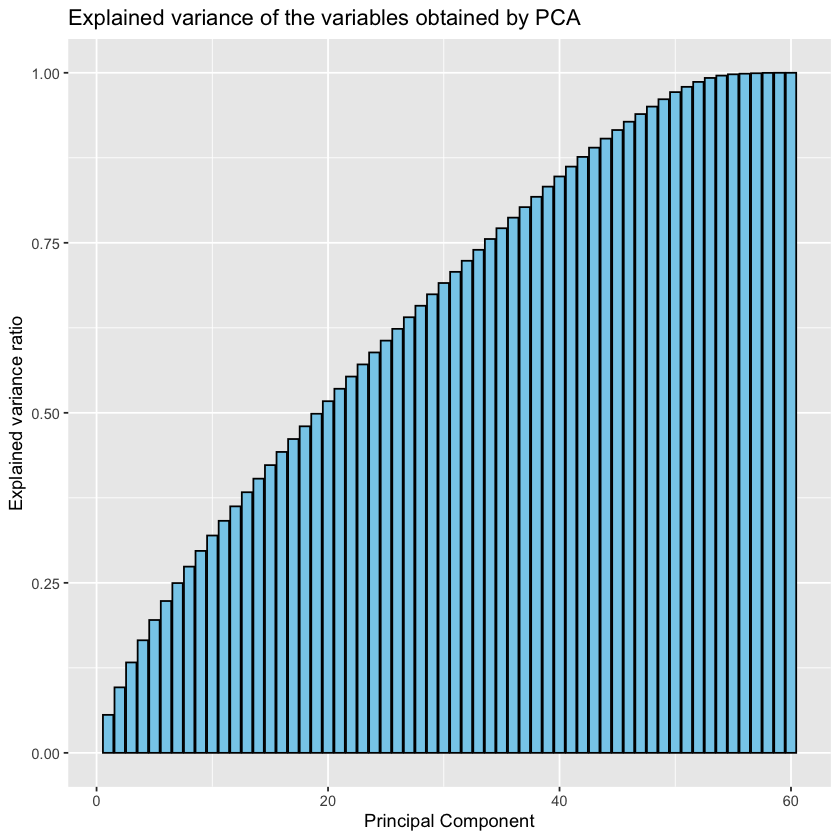

In [18]:
ggplot(cumulative_variance_df, aes(x = PC, y = Variance)) +
  geom_bar(stat = "identity", fill = "skyblue", color = "black") +
  labs(
    title = 'Explained variance of the variables obtained by PCA',
    x = 'Principal Component',
    y = 'Explained variance ratio'
  )

In [ ]:
ggsave(file.path('images', 'cumulative_variance_pca.jpg'), plot = p_cumulative_variance_pca, width = 12, height = 8, units = "in")

### Basic try

In [28]:
n <- sum(cumulative_variance < 0.9) + 1

In [29]:
pca.train.data = pca_data[, 1:n]

In [30]:
kmeans.res <- kmeans(pca.train.data, 2, nstart=10)

In [31]:
agnes.res <- agnes(pca.train.data,  method="single")

In [ ]:
diana.res <- diana(pca.train.data)

In [36]:
pam.final.pca <- pam(pca.train.data, k=2)$clustering

In [41]:
agnes.final.pca <- cutree(agnes.res, k=2)

In [45]:
diana.final.pca <- cutree(diana.res, k=2)

In [49]:
write.csv(kmeans.res$cluster, file.path("data", 'kmeans.csv'), row.names = TRUE)
write.csv(pam.final.pca, file.path("data", 'pca.csv'), row.names = TRUE)
write.csv(agnes.final.pca, file.path("data", 'agnes.csv'), row.names = TRUE)
write.csv(diana.final.pca, file.path("data", 'diana.csv'), row.names = TRUE)

In [104]:
kmeans.pca <- read.csv(file.path("data", 'kmeans.csv'), stringsAsFactors = TRUE)
pam.pca <- read.csv(file.path("data", 'pca.csv'), stringsAsFactors = TRUE)
agnes.pca <- read.csv(file.path("data", 'agnes.csv'), stringsAsFactors = TRUE)
diana.pca <- read.csv(file.path("data", 'diana.csv'), stringsAsFactors = TRUE)

In [106]:
kmeans.pca <- kmeans.pca$x
pam.pca <- pam.pca$x
agnes.pca <- agnes.pca$x
diana.pca <- diana.pca$x

In [107]:
kmeans.pca <- data.frame(kmeans.pca)
pam.pca <- data.frame(pam.pca)
agnes.pca <- data.frame(agnes.pca)
diana.pca <- data.frame(diana.pca);

In [117]:
create_plot <- function(title, cluster_data) {
  ggplot() +
    geom_point(
      aes(x = pca_data$PC1,
          y = pca_data$PC2,
          shape = cluster_data %>% as.factor,
          color=data$income_binary %>% as.factor),
      size = 1) +
    labs(title = title, shape = 'Cluster', color = 'Label')
}

In [128]:
# plot1 <- create_plot('K-Means (PCA)', kmeans.pca)
# plot2 <- create_plot('PAM (PCA)', pam.pca)
# plot3 <- create_plot('AGNES (PCA)', agnes.pca)
# plot4 <- create_plot('DIANA (PCA)', diana.pca)

# grid.arrange(plot1, plot2, plot3, plot4, ncol = 2, nrow = 2)

## More complex

In [129]:
# Create empty vectors to store silhouette values
silhouettes_kmeans <- numeric()
silhouettes_agnes <- numeric()
silhouettes_pam <- numeric()
silhouettes_diana <- numeric()

In [130]:
cluster_range <- 2:10

In [32]:
compute_silhouette <- function(cluster_labels, distance_matrix) {
  silhouette_res <- silhouette(cluster_labels, distance_matrix)
  mean(silhouette_res[, 3])
}

In [132]:
for (clusters in cluster_range) {
  
  # Perform K-means clustering
  kmeans_output <- kmeans(pca.train.data, centers = clusters, nstart = 10)
  silhouette_kmeans_score <- compute_silhouette(kmeans_output$cluster, dist(pca.train.data))
  silhouettes_kmeans <- c(silhouettes_kmeans, silhouette_kmeans_score)
  
  # Perform AGNES clustering
  agnes_clusters <- cutree(agnes.res, k = clusters)
  silhouette_agnes_score <- compute_silhouette(agnes_clusters, dist(pca.train.data))
  silhouettes_agnes <- c(silhouettes_agnes, silhouette_agnes_score)
  
  # Perform PAM clustering
  pam_output <- pam(pca.train.data, k = clusters)
  silhouette_pam_score <- compute_silhouette(pam_output$clustering, dist(pca.train.data))
  silhouettes_pam <- c(silhouettes_pam, silhouette_pam_score)
  
  # Perform DIANA clustering
  diana_output <- cutree(diana.res, k = clusters)
  silhouette_diana_score <- compute_silhouette(diana_output, scaled_data)
  silhouettes_diana <- c(silhouettes_diana, silhouette_diana_score)
}


In [133]:
silhouette_data <- data.frame(
  Clusters = rep(cluster_range, each = 4),
  Silhouette = c(silhouettes_kmeans, silhouettes_agnes, silhouettes_pam, silhouettes_diana),
  ClusteringMethod = factor(
    rep(c('K-means', 'AGNES', 'PAM', 'DIANA'), times = length(cluster_range))
  )
)

In [136]:
write.csv(silhouette_data, file.path("data", 'silhouette_data_dimension.csv'), row.names = TRUE)

In [110]:
silhouette_data <- read.csv(file.path("data", 'silhouette_data_dimension.csv'), stringsAsFactors = TRUE)

In [111]:
max_silhouette_values <- aggregate(Silhouette ~ ClusteringMethod, data = silhouette_data, max)

In [112]:
max_silhouette_values

ClusteringMethod,Silhouette
<fct>,<dbl>
AGNES,0.8109118
DIANA,0.6863135
K-means,0.6735126
PAM,0.8112885


In [113]:
max_silhouette_df <- data.frame(
  k = cluster_range,
  KMeans = max_silhouette_values[max_silhouette_values$ClusteringMethod == "K-means", "Silhouette"],
  AGNES = max_silhouette_values[max_silhouette_values$ClusteringMethod == "AGNES", "Silhouette"],
  PAM = max_silhouette_values[max_silhouette_values$ClusteringMethod == "PAM", "Silhouette"],
  DIANA = max_silhouette_values[max_silhouette_values$ClusteringMethod == "DIANA", "Silhouette"]
)
max_silhouette_df

k,KMeans,AGNES,PAM,DIANA
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.6735126,0.8109118,0.8112885,0.6863135
3,0.6735126,0.8109118,0.8112885,0.6863135
4,0.6735126,0.8109118,0.8112885,0.6863135
5,0.6735126,0.8109118,0.8112885,0.6863135
6,0.6735126,0.8109118,0.8112885,0.6863135
7,0.6735126,0.8109118,0.8112885,0.6863135
8,0.6735126,0.8109118,0.8112885,0.6863135
9,0.6735126,0.8109118,0.8112885,0.6863135
10,0.6735126,0.8109118,0.8112885,0.6863135


In [143]:
write.csv(max_silhouette_df, file.path("data", 'max_silhouette_data_dimension.csv'), row.names = TRUE)

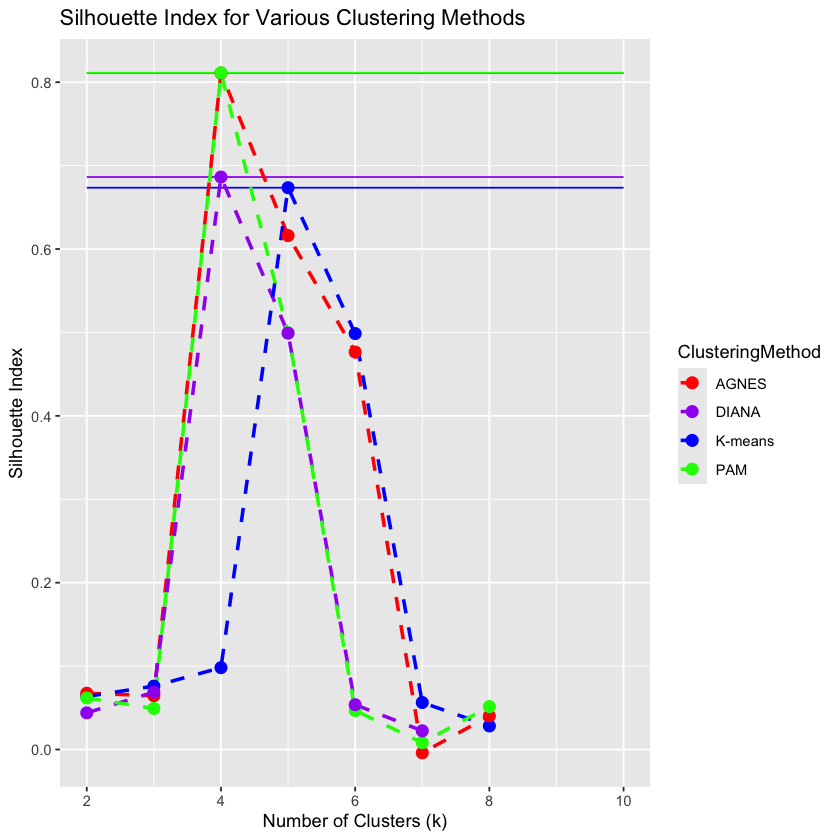

In [146]:
ggplot() +
  geom_line(data=max_silhouette_df, aes(x=k, y=KMeans), linetype = "solid", color = "blue") +
  geom_line(data=max_silhouette_df, aes(x=k, y=AGNES), linetype = "solid", color = "red") +
  geom_line(data=max_silhouette_df, aes(x=k, y=PAM), linetype = "solid", color = "green") +
  geom_line(data=max_silhouette_df, aes(x=k, y=DIANA), linetype = "solid", color = "purple") +
  geom_line(data=silhouette_data, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=1, linetype = "dashed") +
  geom_point(data=silhouette_data, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=3) +
  labs(
    title = 'Silhouette Index for Various Clustering Methods',
    x = 'Number of Clusters (k)',
    y = 'Silhouette Index'
  ) +
  scale_color_manual(values = c('K-means' = 'blue', 'AGNES' = 'red', 'PAM' = 'green', 'DIANA' = 'purple'))

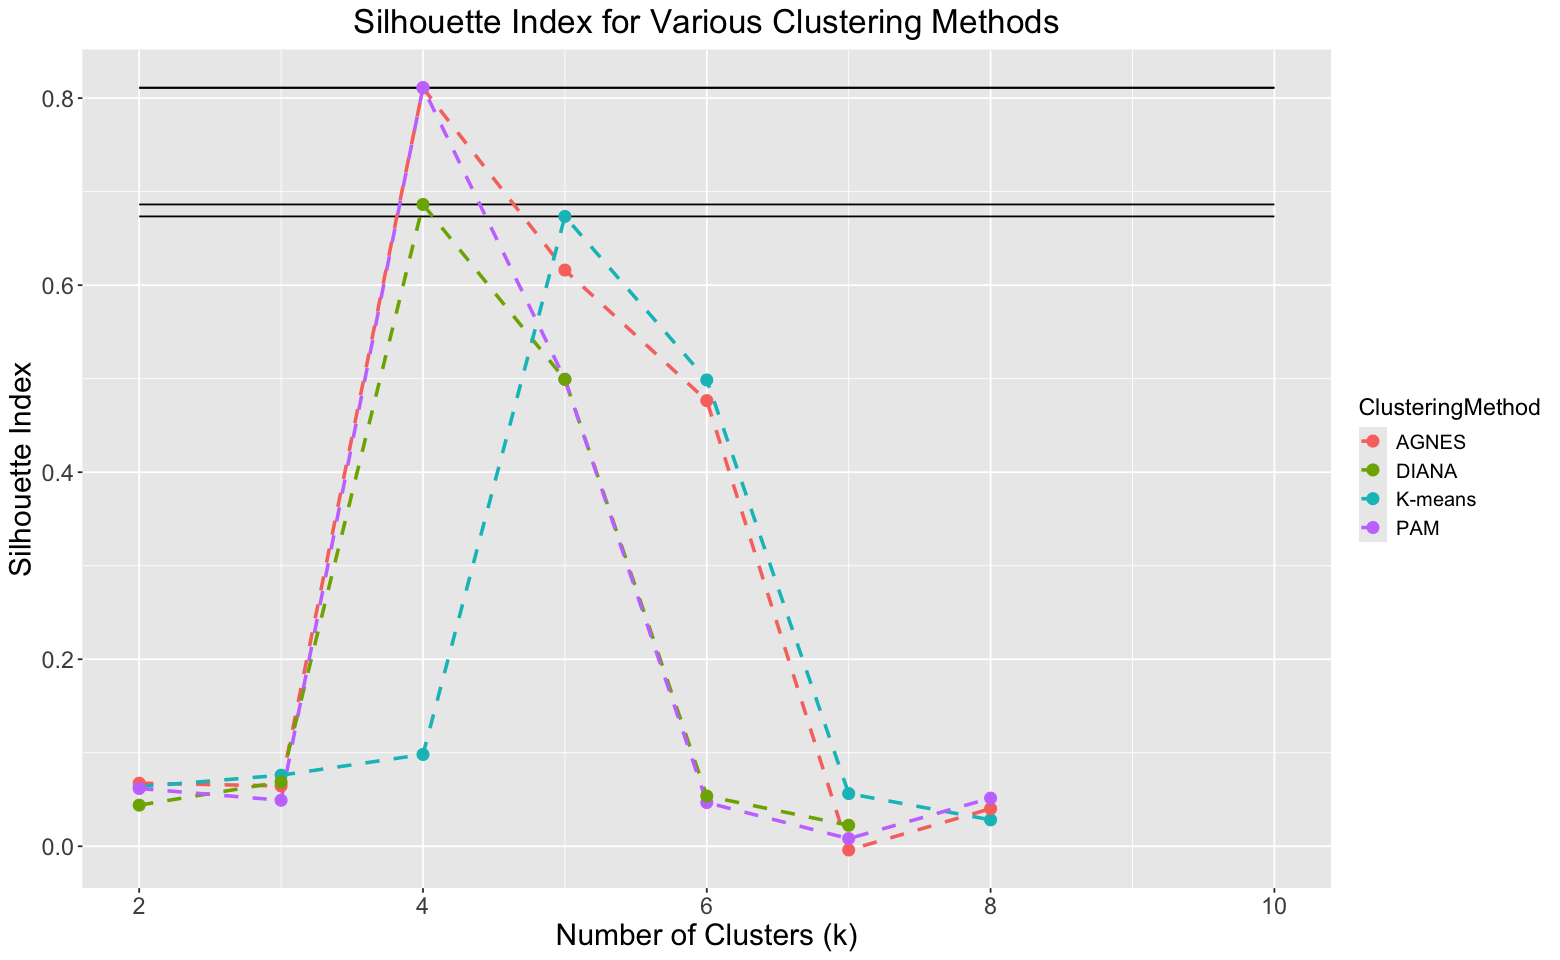

In [114]:
options(repr.plot.width=13, repr.plot.height=8)
p_silhouette_max_pca <- ggplot() +
  geom_line(data=max_silhouette_df, aes(x=k, y=KMeans), linetype = "solid") +
  geom_line(data=max_silhouette_df, aes(x=k, y=AGNES), linetype = "solid") +
  geom_line(data=max_silhouette_df, aes(x=k, y=PAM), linetype = "solid") +
  geom_line(data=max_silhouette_df, aes(x=k, y=DIANA), linetype = "solid") +
  geom_line(data=silhouette_data, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=1, linetype = "dashed") +
  geom_point(data=silhouette_data, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=3) +
  labs(
    title = 'Silhouette Index for Various Clustering Methods',
    x = 'Number of Clusters (k)',
    y = 'Silhouette Index'
  ) +
  theme(axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title = element_text(size=18),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14)) + 
  theme(legend.background = element_rect(fill = alpha('white', 0)))
p_silhouette_max_pca

In [115]:
ggsave(file.path('images', 'silhouette_max_pca.jpg'), plot = p_silhouette_max_pca, width = 13, height = 8, units = "in")

# MDS

In [150]:
mds.res <- cmdscale(dissim_data_matrix, k=2) %>% data.frame

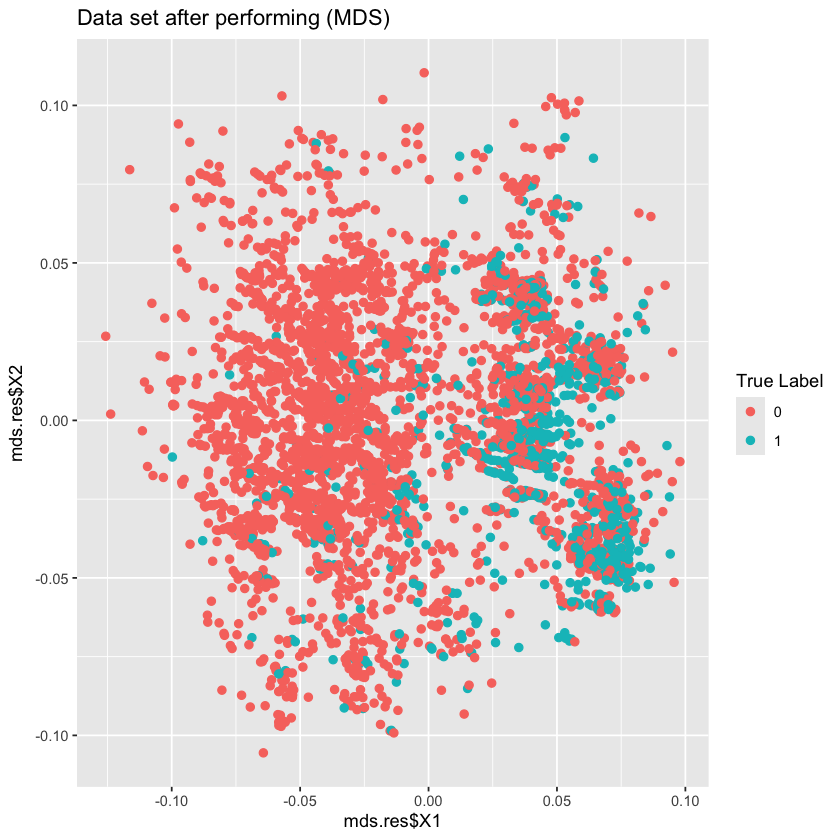

In [151]:
ggplot() +
  geom_point(
    aes(x=mds.res$X1,
        y=mds.res$X2,
        color=data$income_binary %>% as.factor),
    size=2)+
  labs(title='Data set after performing (MDS)', color='True Label')

In [154]:
mds.res2 <- cmdscale(dissim_data_matrix, k=10)

In [157]:
d.max <- ncol(scaled_data)

In [44]:
d.max 

[1] 60

In [159]:
results_df <- data.frame(Dimension = 1:d.max, STRESS = numeric(d.max))

# Compute MDS and STRESS for each dimension
for (d in 1:d.max) {
  mds_k <- cmdscale(dissim_data_matrix, k = d)
  dist_mds_k <- dist(mds_k, method = "euclidean")
  
  # Calculate STRESS
  dis_original <- dissim_data_matrix
  dist_mds_k <- as.matrix(dist_mds_k)
  STRESS <- sum((dis_original - dist_mds_k)^2)

  results_df$STRESS[d] <- STRESS
}

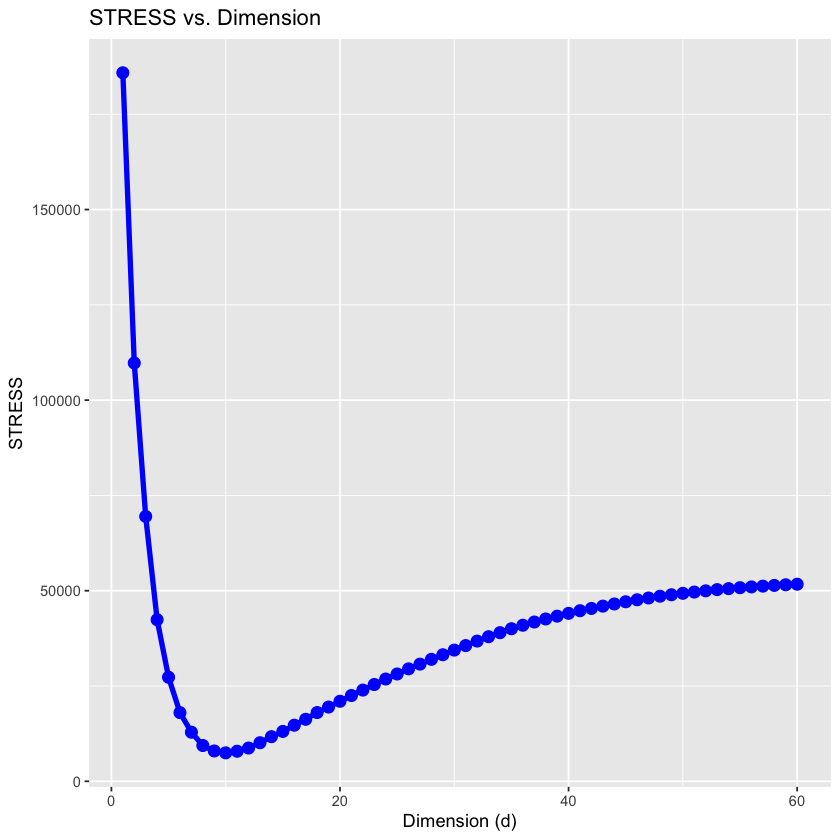

In [160]:
ggplot(results_df, aes(x = Dimension, y = STRESS)) +
  geom_line(size = 1.5, color = "blue") +
  geom_point(size = 3, shape = 19) +
  labs(
    title = "STRESS vs. Dimension",
    x = "Dimension (d)",
    y = "STRESS"
  )

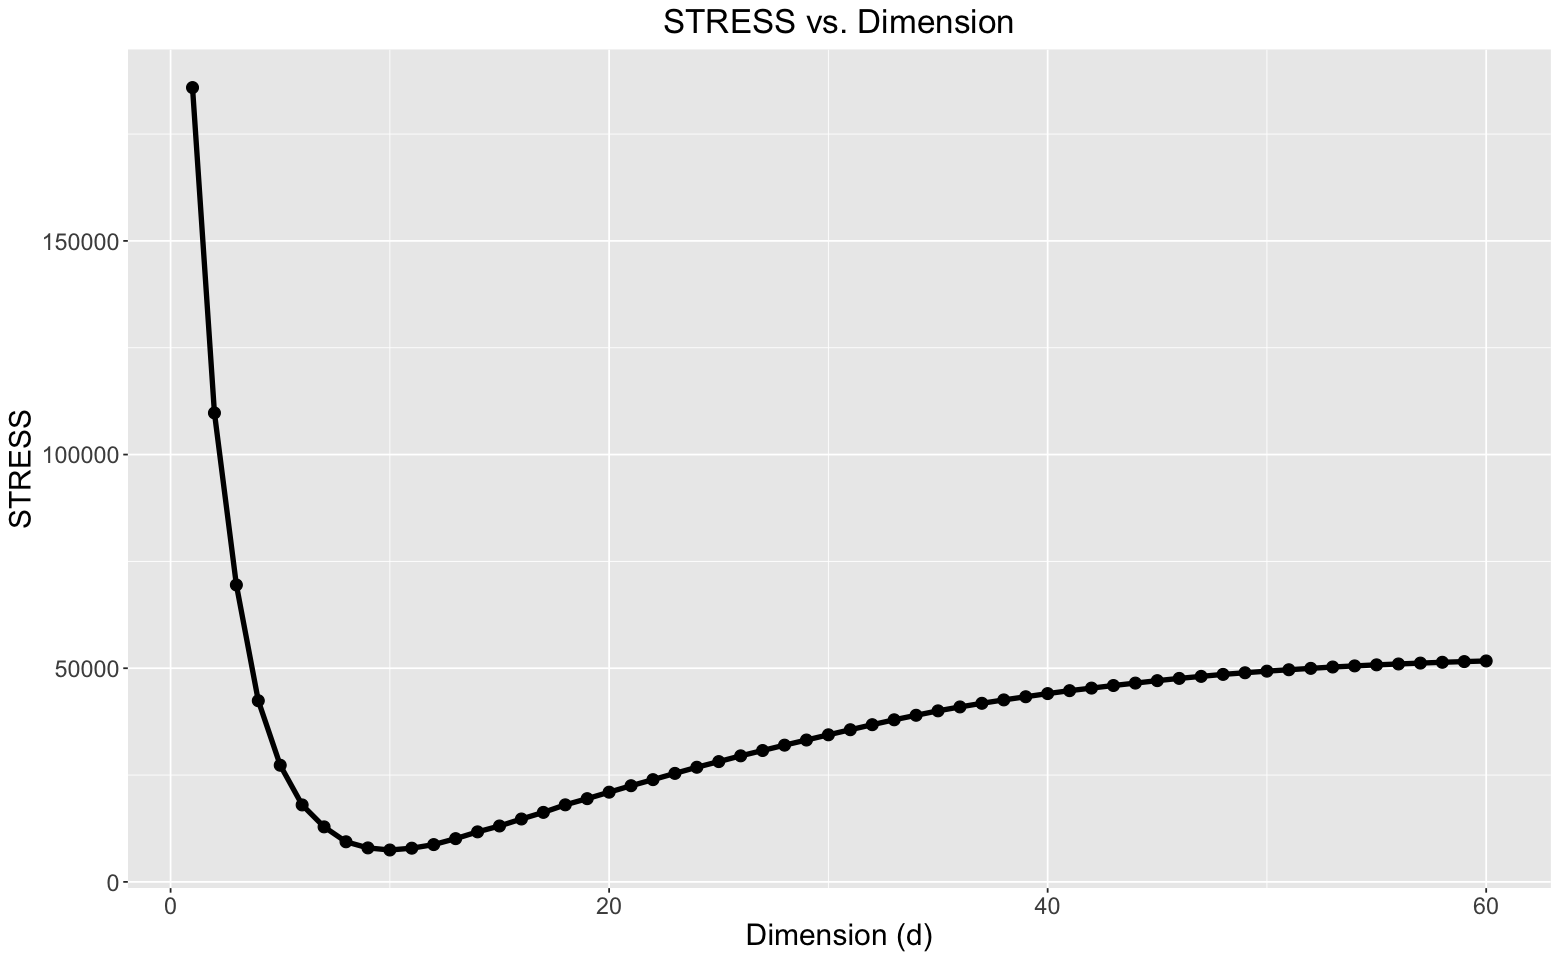

In [108]:
options(repr.plot.width=13, repr.plot.height=8)
stress <- ggplot(results_df, aes(x = Dimension, y = STRESS)) +
  geom_line(size = 1.5) +
  geom_point(size = 3, shape = 19) +
  labs(
    title = "STRESS vs. Dimension",
    x = "Dimension (d)",
    y = "STRESS"
  ) +
  theme(axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title = element_text(size=18),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14)) + 
  theme(legend.background = element_rect(fill = alpha('white', 0)))
stress

In [109]:
ggsave(file.path('images', 'mds_stress.jpg'), plot = stress, width = 13, height = 8, units = "in")

In [4]:
results_df$Dimension[which.min(results_df$STRESS)]

[1] 10

In [165]:
write.csv(results_df, file.path("data", 'mds_results_stress.csv'), row.names = TRUE)

In [3]:
results_df <- read.csv(file.path("data", 'mds_results_stress.csv'), stringsAsFactors = TRUE)

In [17]:
n.mds.stress <- results_df$Dimension[which.min(results_df$STRESS)]

In [28]:
mds.train.data <- cmdscale(dissim_data_matrix, k = n.mds.stress)

In [29]:
write.csv(mds.train.data, file.path("data", 'mds_data.csv'), row.names = TRUE)

In [51]:
# Create empty vectors to store silhouette values
silhouettes_kmeans_mds <- numeric()
silhouettes_agnes_mds <- numeric()
silhouettes_pam_mds <- numeric()
silhouettes_diana_mds <- numeric()

In [47]:
silhouettes_diana_mds <- numeric()
silhouettes_diana_clust <- numeric()

In [54]:
agnes.res.mds <- agnes(mds.train.data,  method="single")

In [30]:
diana.res.mds <- diana(mds.train.data)

In [48]:
# problems with diana
for (clusters in 8:10) {
    print(clusters)
  diana_clust <- cutree(diana.res.mds, k = clusters)
  silhouette_diana_clust_score <- compute_silhouette(diana_clust, dist(mds.train.data))
  silhouettes_diana_clust <- c(silhouettes_diana_clust, silhouette_diana_clust_score)
}

[1] 8
[1] 9
[1] 10


In [49]:
silhouettes_diana_clust

[1] 0.1788062 0.1896359 0.1891122

In [55]:
for (clusters in cluster_range) {
    print(clusters)
  
  # Perform K-means clustering
  kmeans_output_mds <- kmeans(mds.train.data, centers = clusters, nstart = 10)
  silhouette_kmeans_score_mds <- compute_silhouette(kmeans_output_mds$cluster, dist(mds.train.data))
  silhouettes_kmeans_mds <- c(silhouettes_kmeans_mds, silhouette_kmeans_score_mds)
  
  # Perform AGNES clustering
  agnes_clusters_mds <- cutree(agnes.res.mds, k = clusters)
  silhouette_agnes_score_mds <- compute_silhouette(agnes_clusters_mds, dist(mds.train.data))
  silhouettes_agnes_mds <- c(silhouettes_agnes_mds, silhouette_agnes_score_mds)
  
  # Perform PAM clustering
  pam_output_mds <- pam(mds.train.data, k = clusters)
  silhouette_pam_score_mds <- compute_silhouette(pam_output_mds$clustering, dist(mds.train.data))
  silhouettes_pam_mds <- c(silhouettes_pam_mds, silhouette_pam_score_mds)
  
  # Perform DIANA clustering
  diana_output_mds <- cutree(diana.res.mds, k = clusters)
  silhouette_diana_score_mds <- compute_silhouette(diana_output_mds, dist(mds.train.data))
  silhouettes_diana_mds <- c(silhouettes_diana_mds, silhouette_diana_score_mds)
}

[1] 2
[1] 3
[1] 4
[1] 5
[1] 6
[1] 7
[1] 8
[1] 9
[1] 10


In [76]:
silhouettes_diana_mds <- numeric()

In [77]:
for (clusters in cluster_range) {
    print(clusters)
  # Perform DIANA clustering
    diana_output_mds <- cutree(diana.res.mds, k = clusters)
    silhouette_diana_score_mds <- compute_silhouette(diana_output_mds, dist(mds.train.data))
    print(silhouette_diana_score_mds)
    silhouettes_diana_mds <- c(silhouettes_diana_mds, silhouette_diana_score_mds)
    print(silhouettes_diana_mds)
}

[1] 2
[1] 0.2435577
[1] 0.2435577
[1] 3
[1] 0.1577722
[1] 0.2435577 0.1577722
[1] 4
[1] 0.1494442
[1] 0.2435577 0.1577722 0.1494442
[1] 5
[1] 0.1444143
[1] 0.2435577 0.1577722 0.1494442 0.1444143
[1] 6
[1] 0.1788222
[1] 0.2435577 0.1577722 0.1494442 0.1444143 0.1788222
[1] 7
[1] 0.1869456
[1] 0.2435577 0.1577722 0.1494442 0.1444143 0.1788222 0.1869456
[1] 8
[1] 0.1788062
[1] 0.2435577 0.1577722 0.1494442 0.1444143 0.1788222 0.1869456 0.1788062
[1] 9
[1] 0.1896359
[1] 0.2435577 0.1577722 0.1494442 0.1444143 0.1788222 0.1869456 0.1788062
[8] 0.1896359
[1] 10
[1] 0.1891122
[1] 0.2435577 0.1577722 0.1494442 0.1444143 0.1788222 0.1869456 0.1788062
[8] 0.1896359 0.1891122


In [82]:
silhouettes_pam_mds <- numeric()

In [84]:
for (clusters in cluster_range) {
    print(clusters)
  # Perform PAM clustering
  pam_output_mds <- pam(mds.train.data, k = clusters)
  silhouette_pam_score_mds <- compute_silhouette(pam_output_mds$clustering, dist(mds.train.data))
    print(silhouette_pam_score_mds)
  silhouettes_pam_mds <- c(silhouettes_pam_mds, silhouette_pam_score_mds)
  print(silhouettes_pam_mds)
    }

[1] 2
[1] 0.210646
[1] 0.210646
[1] 3
[1] 0.2160142
[1] 0.2106460 0.2160142
[1] 4
[1] 0.1647791
[1] 0.2106460 0.2160142 0.1647791
[1] 5
[1] 0.1725654
[1] 0.2106460 0.2160142 0.1647791 0.1725654
[1] 6
[1] 0.1718769
[1] 0.2106460 0.2160142 0.1647791 0.1725654 0.1718769
[1] 7
[1] 0.1761104
[1] 0.2106460 0.2160142 0.1647791 0.1725654 0.1718769 0.1761104
[1] 8
[1] 0.1736117
[1] 0.2106460 0.2160142 0.1647791 0.1725654 0.1718769 0.1761104 0.1736117
[1] 9
[1] 0.1731231
[1] 0.2106460 0.2160142 0.1647791 0.1725654 0.1718769 0.1761104 0.1736117
[8] 0.1731231
[1] 10
[1] 0.187563
[1] 0.2106460 0.2160142 0.1647791 0.1725654 0.1718769 0.1761104 0.1736117
[8] 0.1731231 0.1875630


In [85]:
length(silhouettes_pam_mds)

[1] 9

In [86]:
silhouettes_agnes_mds <- numeric()

In [87]:
for (clusters in cluster_range) {
    print(clusters)  
  # Perform AGNES clustering
  agnes_clusters_mds <- cutree(agnes.res.mds, k = clusters)
  silhouette_agnes_score_mds <- compute_silhouette(agnes_clusters_mds, dist(mds.train.data))
    print(silhouette_agnes_score_mds)
  silhouettes_agnes_mds <- c(silhouettes_agnes_mds, silhouette_agnes_score_mds)
    print(silhouettes_agnes_mds)
    }  

[1] 2
[1] 0.3507303
[1] 0.3507303
[1] 3
[1] 0.3284115
[1] 0.3507303 0.3284115
[1] 4
[1] 0.3099997
[1] 0.3507303 0.3284115 0.3099997
[1] 5
[1] 0.2870723
[1] 0.3507303 0.3284115 0.3099997 0.2870723
[1] 6
[1] 0.2636567
[1] 0.3507303 0.3284115 0.3099997 0.2870723 0.2636567
[1] 7
[1] 0.252049
[1] 0.3507303 0.3284115 0.3099997 0.2870723 0.2636567 0.2520490
[1] 8
[1] 0.2470963
[1] 0.3507303 0.3284115 0.3099997 0.2870723 0.2636567 0.2520490 0.2470963
[1] 9
[1] 0.235607
[1] 0.3507303 0.3284115 0.3099997 0.2870723 0.2636567 0.2520490 0.2470963
[8] 0.2356070
[1] 10
[1] 0.23035
[1] 0.3507303 0.3284115 0.3099997 0.2870723 0.2636567 0.2520490 0.2470963
[8] 0.2356070 0.2303500


In [88]:
length(silhouettes_agnes_mds)

[1] 9

In [89]:
silhouettes_kmeans_mds <- numeric()

In [90]:
for (clusters in cluster_range) {
    print(clusters)
  
  # Perform K-means clustering
  kmeans_output_mds <- kmeans(mds.train.data, centers = clusters, nstart = 10)
  silhouette_kmeans_score_mds <- compute_silhouette(kmeans_output_mds$cluster, dist(mds.train.data))
    print(silhouette_kmeans_score_mds)
  silhouettes_kmeans_mds <- c(silhouettes_kmeans_mds, silhouette_kmeans_score_mds)
    print(silhouettes_kmeans_mds)
  }

[1] 2
[1] 0.2134998
[1] 0.2134998
[1] 3
[1] 0.2365441
[1] 0.2134998 0.2365441
[1] 4
[1] 0.1840351
[1] 0.2134998 0.2365441 0.1840351
[1] 5
[1] 0.1787918
[1] 0.2134998 0.2365441 0.1840351 0.1787918
[1] 6
[1] 0.2123604
[1] 0.2134998 0.2365441 0.1840351 0.1787918 0.2123604
[1] 7
[1] 0.1835884
[1] 0.2134998 0.2365441 0.1840351 0.1787918 0.2123604 0.1835884
[1] 8
[1] 0.1972297
[1] 0.2134998 0.2365441 0.1840351 0.1787918 0.2123604 0.1835884 0.1972297
[1] 9
[1] 0.1883322
[1] 0.2134998 0.2365441 0.1840351 0.1787918 0.2123604 0.1835884 0.1972297
[8] 0.1883322
[1] 10
[1] 0.2128047
[1] 0.2134998 0.2365441 0.1840351 0.1787918 0.2123604 0.1835884 0.1972297
[8] 0.1883322 0.2128047


In [91]:
length(silhouettes_kmeans_mds)

[1] 9

In [92]:
silhouette_data_mds <- data.frame(
  Clusters = rep(cluster_range, each = 4),
  Silhouette = c(silhouettes_kmeans_mds, silhouettes_agnes_mds, silhouettes_pam_mds, silhouettes_diana_mds),
  ClusteringMethod = factor(
    rep(c('K-means', 'AGNES', 'PAM', 'DIANA'), times = length(cluster_range))
  )
)

In [93]:
silhouette_data_mds

Clusters,Silhouette,ClusteringMethod
<int>,<dbl>,<fct>
2,0.2134998,K-means
2,0.2365441,AGNES
2,0.1840351,PAM
2,0.1787918,DIANA
3,0.2123604,K-means
3,0.1835884,AGNES
3,0.1972297,PAM
3,0.1883322,DIANA
4,0.2128047,K-means


In [94]:
# write.csv(silhouette_data_mds, file.path("data", 'silhouette_data_dimension_mds.csv'), row.names = TRUE)

In [5]:
silhouette_data_mds <- read.csv(file.path("data", 'silhouette_data_dimension_mds.csv'), stringsAsFactors = TRUE)

In [95]:
max_silhouette_mds_values <- aggregate(Silhouette ~ ClusteringMethod, data = silhouette_data_mds, max)

In [96]:
max_silhouette_mds_values

ClusteringMethod,Silhouette
<fct>,<dbl>
AGNES,0.3507303
DIANA,0.3099997
K-means,0.2870723
PAM,0.3284115


In [12]:
cluster_range <- 2:10

In [99]:
max_silhouette_mds_df <- data.frame(
  k = cluster_range,
  KMeans = max_silhouette_mds_values[max_silhouette_mds_values$ClusteringMethod == "K-means", "Silhouette"],
  AGNES = max_silhouette_mds_values[max_silhouette_mds_values$ClusteringMethod == "AGNES", "Silhouette"],
  PAM = max_silhouette_mds_values[max_silhouette_mds_values$ClusteringMethod == "PAM", "Silhouette"],
  DIANA = max_silhouette_mds_values[max_silhouette_mds_values$ClusteringMethod == "DIANA", "Silhouette"]
)
max_silhouette_mds_df

k,KMeans,AGNES,PAM,DIANA
<int>,<dbl>,<dbl>,<dbl>,<dbl>
2,0.2870723,0.3507303,0.3284115,0.3099997
3,0.2870723,0.3507303,0.3284115,0.3099997
4,0.2870723,0.3507303,0.3284115,0.3099997
5,0.2870723,0.3507303,0.3284115,0.3099997
6,0.2870723,0.3507303,0.3284115,0.3099997
7,0.2870723,0.3507303,0.3284115,0.3099997
8,0.2870723,0.3507303,0.3284115,0.3099997
9,0.2870723,0.3507303,0.3284115,0.3099997
10,0.2870723,0.3507303,0.3284115,0.3099997


In [177]:
# write.csv(max_silhouette_mds_df, file.path("data", 'max_silhouette_data_dimension_mds.csv'), row.names = TRUE)

In [14]:
max_silhouette_mds_df <- read.csv(file.path("data", 'max_silhouette_data_dimension_mds.csv'), stringsAsFactors = TRUE)

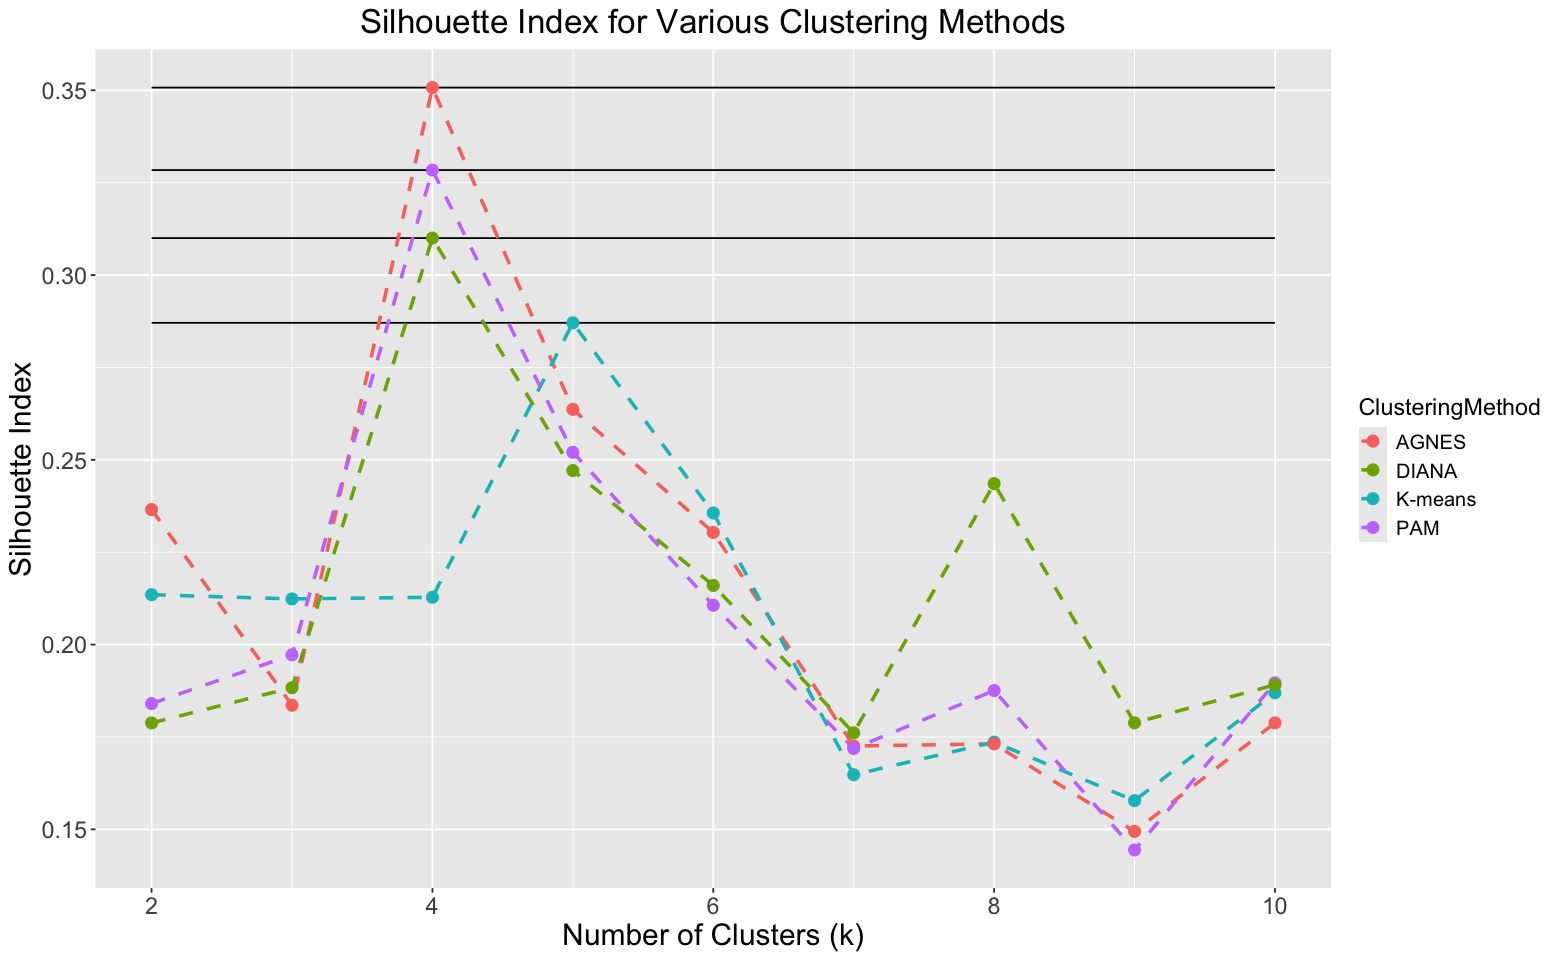

In [105]:
options(repr.plot.width=13, repr.plot.height=8)
p_silhouette_max_mds <- ggplot() +
  geom_line(data=max_silhouette_mds_df, aes(x=k, y=KMeans), linetype = "solid") +
  geom_line(data=max_silhouette_mds_df, aes(x=k, y=AGNES), linetype = "solid") +
  geom_line(data=max_silhouette_mds_df, aes(x=k, y=PAM), linetype = "solid") +
  geom_line(data=max_silhouette_mds_df, aes(x=k, y=DIANA), linetype = "solid") +
  geom_line(data=silhouette_data_mds, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=1, linetype = "dashed") +
  geom_point(data=silhouette_data_mds, aes(x=Clusters, y=Silhouette, color=ClusteringMethod), size=3) +
  labs(
    title = 'Silhouette Index for Various Clustering Methods',
    x = 'Number of Clusters (k)',
    y = 'Silhouette Index'
  )+
  theme(axis.text.x = element_text(size=14),
        axis.text.y = element_text(size=14),
        axis.title = element_text(size=18),
        plot.title = element_text(hjust = 0.5, size=20),
        legend.text = element_text(size = 12), 
        legend.title = element_text(size = 14)) + 
  theme(legend.background = element_rect(fill = alpha('white', 0)))
p_silhouette_max_mds

In [107]:
ggsave(file.path('images', 'silhouette_max_mds.jpg'), plot = p_silhouette_max_mds, width = 13, height = 8, units = "in")